In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

In [3]:
# lendo o data frame a exibindo as primeiras 5 linhas
df = pd.read_csv('heart_2.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Tratando os dados

In [4]:
#verificando se tem valores nulos no data frame
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [5]:
# removendo valores duplicados caso aja algum
df=df.drop_duplicates(keep="first")

In [31]:
# criando uma cópia e modificando alguns dados do data frame para o propósito da análise.
df_1=df.copy()
# MUDANDO NUMERAÇÃO DA COLUNA SEX (GÊNERO) DE 0 E 1 PARA FEM E MASC
df_1['sex'] = df_1['sex'].replace([1], 'male')
df_1['sex'] = df_1['sex'].replace([0], 'female')
# MUDANDO CÓDIGO DAS DORES NO PEITO 
df_1['cp'] = df_1['cp'].replace([0], 'angina')
df_1['cp'] = df_1['cp'].replace([1], 'moderada')
df_1['cp'] = df_1['cp'].replace([2], 'dor comum')
df_1['cp'] = df_1['cp'].replace([3], 'assintomatico')
# MUDANDO O CÓDIGO DA PROBABILIDADE DE INFARTO PARA SIM - NÃO
df_1['output'] = df_1['output'].replace([0], 'SIM')
df_1['output'] = df_1['output'].replace([1], 'NÃO')

df_1.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,male,assintomatico,145,233,1,0,150,0,2.3,0,0,1,NÃO
1,37,male,dor comum,130,250,0,1,187,0,3.5,0,0,2,NÃO
2,41,female,moderada,130,204,0,0,172,0,1.4,2,0,2,NÃO
3,56,male,moderada,120,236,0,1,178,0,0.8,2,0,2,NÃO
4,57,female,angina,120,354,0,1,163,1,0.6,2,0,2,NÃO


In [7]:
# gerando uma descrição geral do data frame
df_1.describe()

,age,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570
std,9.04797,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026
min,29.00000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,55.50000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000
75%,61.00000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000
max,77.00000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000


In [8]:
# verificando quantas linhas e colunas tem no data frame
df_1.shape

(302, 14)

In [9]:
# listando os nomes das colunas do dataframe
df_1.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [10]:
# verificando quais os tipos de dados do data frame
df_1.dtypes

age           int64
sex          object
cp           object
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output       object
dtype: object

In [11]:
#convertendo em string os objetos
string_col = df_1.select_dtypes(include="object").columns
df_1[string_col]=df_1[string_col].astype("string")

In [12]:
#verificando os tipos de dados novamente
df_1.dtypes

age           int64
sex          string
cp           string
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output       string
dtype: object

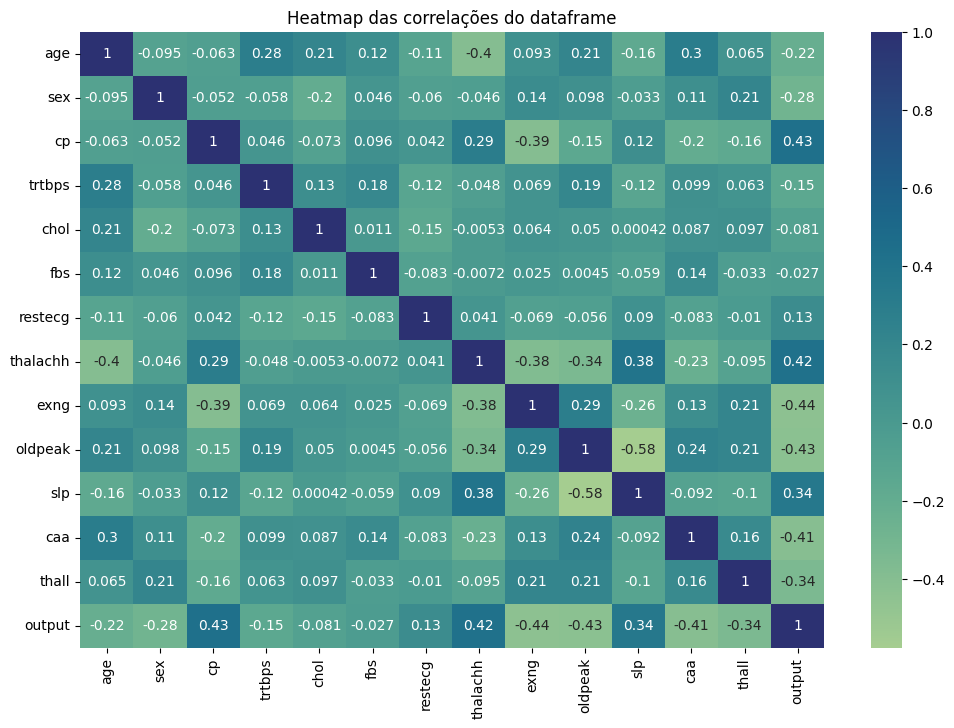

In [13]:
# Plotando a correlação dos dados do data frame puro
df_corr = df.corr().transpose()
fig = plt.figure(figsize=(12,8))
ax = plt.axes()
sns.heatmap(data = df_corr,annot= True,cmap = 'crest')
ax.set_title('Heatmap das correlações do dataframe')
plt.show()

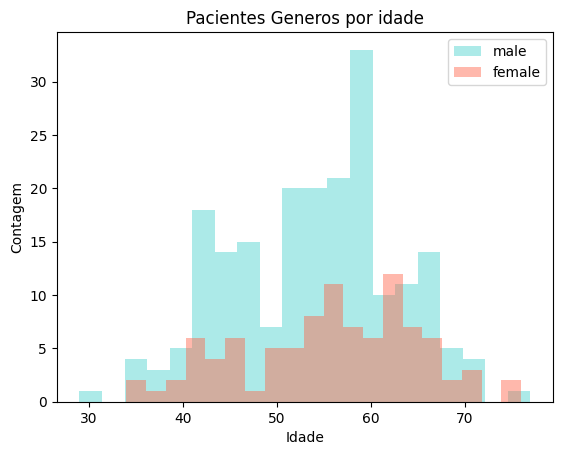

In [14]:
# criando filtro para mostrar diferença de genero na pesquisa
plt.hist(x='age', data=df_1[df_1['sex']=='male'],label='male',color='mediumturquoise',alpha=0.45,bins=20)
plt.hist(x='age', data=df_1[df_1['sex']=='female'],label='female',color='tomato',alpha=0.45,bins=20)
plt.title('Pacientes Generos por idade')
plt.xlabel('Idade')
plt.ylabel('Contagem')
plt.legend()
plt.show()

In [57]:
fig=px.histogram(data_frame=df_1, x='age', color='output',facet_col='restecg' ,barmode='overlay')
fig.update_layout(title={'text' : 'Idade x Risco de infarto x ECC em Repouso','y': 0.05, 'x': 0.5})
fig.show()


In [16]:

for coluna in df_1.select_dtypes(include=np.number):
    fig = px.histogram(data_frame= df_1, x=coluna, facet_col='sex', color='output',barmode='overlay')
fig.update_layout(title={'text' : 'Talassemia x Infarto x Gênero','y': 0.9, 'x': 0.5})
fig.show()

In [17]:

fig = px.violin(data_frame=df_1, x='sex', y='trtbps', color='output')
fig.update_layout(title={'text' : 'Hipertensão x Risco de infarto x Gênero','y': 0.9, 'x': 0.5})
fig.show()


#### Você sabe o que é Talassemia?
    - A talassemia é uma forma de anemia crônica, de origem genética (hereditária), ou seja, passada dos pais para os filhos. Não é transmitida pelo sangue, ar, água, contato físico ou sexual e não é causada por deficiência na alimentação, carência de vitaminas ou sais minerais.
    A talassemia faz parte de um grupo de doenças do sangue (hemoglobinopatias) caracterizadas por defeito genético que resulta em diminuição da produção de um dos dois tipos de cadeias que formam a molécula de hemoglobina. Dependendo dos genes envolvidos, o defeito é identificado como a-talassemia (defeito na cadeia alfa) ou b-talassemia (defeito na cadeia beta).
    Embora haja outros tipos de talassemia, o mais comum no Brasil e no mundo é a beta-talassemia que, dependendo de sua gravidade, se divide em três grupos principais: talassemia minor, talassemia major e talassemia intermédia.
    * Nesta análise dividimos em níveis:
        - Sem Talassemia = Nível 0 
        - Talassemia minor = Nível 1 ( não considerada uma doença e sim uma característica genética)
        - Talassemia intermédia = Nível 2 ( A gravidade da talassemia intermédia é extremamente variável )
        - Talassemia major = Nível 3 ( é uma condição tratável. A terapia regular de transfusões sangüíneas )

### Análise por Gênero 
- Gráfico Gênero por Idade:
    - Esta base de dados contem mais homens que mulhers
    - Pacientes entre 50 e 60 anos estão e maior número, sendo o pico entre 58 e 60

- Gráfico Idade x Risco de infarto x ECG em Repouso:
    - O ECG em repouso teve uma inclinação maior para chance de ataque cardíaco no nivel 0 (normal)
    com os picos maiores entre as idades de 58 a 62 anos isso indica que estes pacientes tem o risco
    de infarto quando em movimento.

-Gráfico Idade x Risco de infarto x Gênero:
    - as idades se diferenciam para o risco de infarto entre homens e mulheres
    - me chamou atenção um pequeno grupo depois dos 70 anos de homens com risco de infarto
    - na mesma faixa etária de a cima de 70 anos as mulheres não correm risco de infato

- Gráfico Talassemia x Infarto x Gênero
    - Os Pacientes do sexo masculino tem maior quantidade de talassemia nivel 3 sendo esta a mais grave
    - Por causa da gravidade da talassemia os pacientes sexo masculino tem maior risco de infarto.
    - Os Pacientes do sexo feminino tem maior concentração de talassemia de nível 2 e não correm risco de infarto

- Gráfico Hipertensão x Risco de infarto x Gênero
    - Pacientes do sexo masculino e feminino não tem uma relação eumento da pressão com risco de infarto
    esta não correlação também pode ser vista no primeiro gráfico onde cruzando trtbps com output
    sua saíde é negativa ( -0,15 )



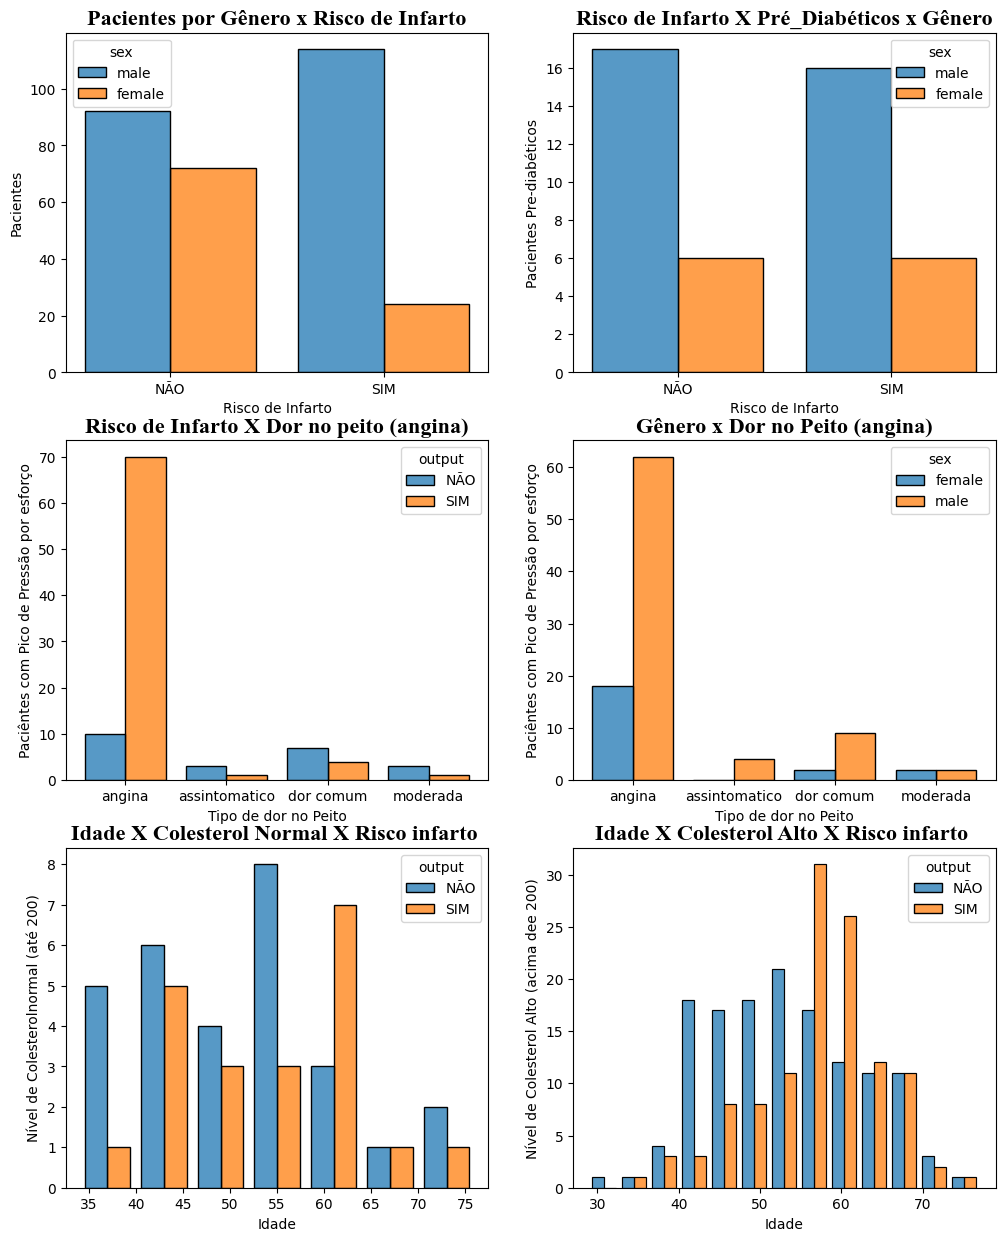

In [32]:
# criando um subplot para ploter 6 gráficos em um
fig, axes = plt.subplots(3,2, figsize=(12,15))

sns.histplot(data=df_1, x='output', hue='sex',shrink=.8,multiple='dodge', ax=axes[0,0])
sns.histplot(x='output', data=df_1[df_1['fbs'] == 1], hue='sex', shrink=.8,multiple='dodge', ax = axes[0,1])
sns.histplot(x="cp", data=df_1[df_1["exng"] == 1], hue='output', shrink=.8,multiple='dodge', ax=axes[1,0])
sns.histplot(x="cp", data=df_1[df_1["exng"] == 1], hue='sex', shrink=.8,multiple='dodge', ax=axes[1,1])
sns.histplot(x="age",data=df_1[df_1["chol"]<=200],hue='output', shrink=.8,multiple='dodge', ax = axes[2,0])
sns.histplot(x="age",data=df_1[df_1["chol"]>200],hue='output', shrink=.8,multiple='dodge', ax = axes[2,1])

axes[0,0].set_title('Pacientes por Gênero x Risco de Infarto', fontname='Times New Roman', size=16 ,fontweight="bold")
axes[0,0].set(xlabel ='Risco de Infarto', ylabel= 'Pacientes')

axes[0,1].set_title('Risco de Infarto X Pré_Diabéticos x Gênero', fontname='Times New Roman', size=16 ,fontweight="bold")
axes[0,1].set(xlabel ='Risco de Infarto', ylabel= 'Pacientes Pre-diabéticos')

axes[1,0].set_title('Risco de Infarto X Dor no peito (angina)', fontname='Times New Roman', size=16 ,fontweight="bold")
axes[1,0].set(xlabel ='Tipo de dor no Peito', ylabel= 'Paciêntes com Pico de Pressão por esforço')

axes[1,1].set_title('Gênero x Dor no Peito (angina)', fontname='Times New Roman', size=16 ,fontweight="bold")
axes[1,1].set(xlabel ='Tipo de dor no Peito', ylabel= 'Paciêntes com Pico de Pressão por esforço')

axes[2,0].set_title('Idade X Colesterol Normal X Risco infarto ', fontname='Times New Roman', size=16 ,fontweight="bold")
axes[2,0].set(xlabel ='Idade', ylabel= 'Nível de Colesterol normal (até 200)')

axes[2,1].set_title('Idade X Colesterol Alto X Risco infarto ', fontname='Times New Roman', size=16 ,fontweight="bold")
axes[2,1].set(xlabel ='Idade', ylabel= 'Nível de Colesterol Alto (acima de 200)')

plt.show()

#### Analisando sublot

    - Gráfico Pacientes por Gênero x Risco de Infarto:
        - Mesmo tendo mais homens que mulheres é nítido o risco maior de infarto de homens
    - Gráfico Risco de Infarto X Pré_Diabéticos x Gênero:
        - Não há uma relação entre pacientes com o nível de glicose acima do normal e Chance de infarto
    - Gráfico Risco de Infarto X Dor no peito (angina):
        - O aumento da pressão arterial está diretamente ligado a angina levando a um maior risco de infarto
    - Gráfico Gênero x Dor no Peito (angina):
        - Pacientes do sexo masculino tem uma grande diferença em relação aos femininos de risco de infarto,
        mesmo com uma quantidade maior de homens na base a diferênça e grande.
    - Gráfico Idade X Colesterol Normal X Risco infarto:
        - Neste gráfico mesmo com o nível de colesterol normal há um pico de chance de infarto entre a idade de 60 e 65 anos
    - Gráfico Idade X Colesterol Alto X Risco infarto:
        -Com o nível de Colesterol alto o risco de infarto é bem maior entre 58 e 62 anos

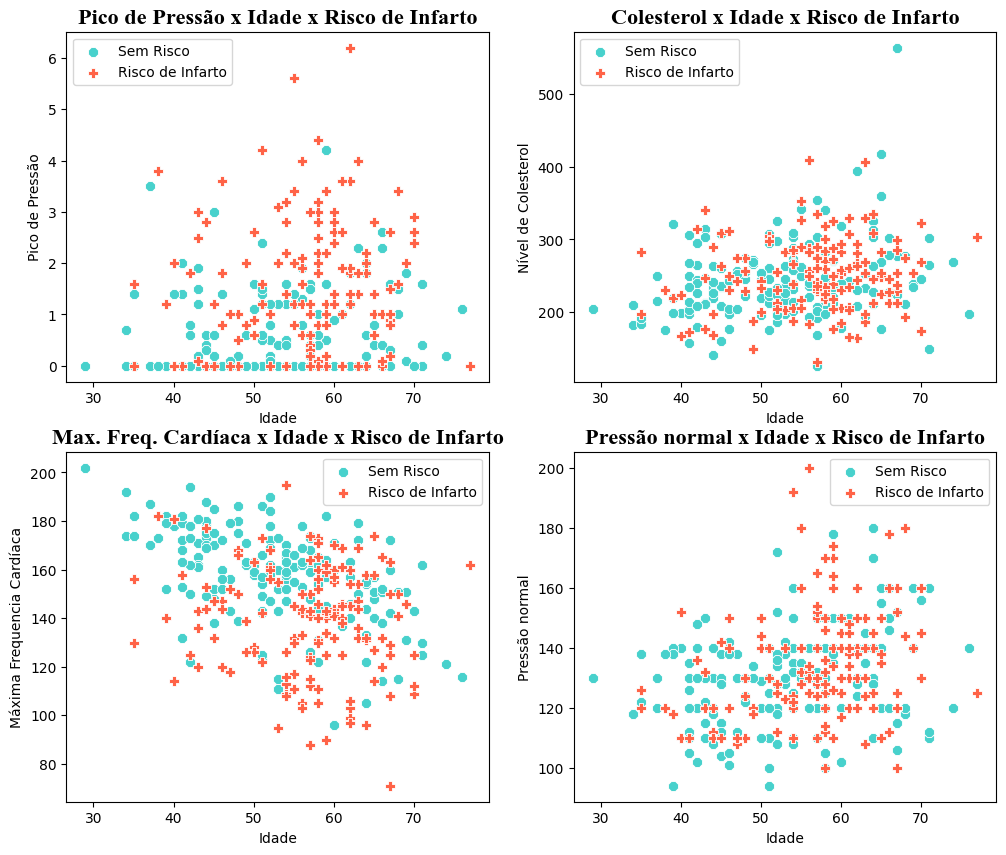

In [19]:
fig, axes = plt.subplots(2,2, figsize=(12,10))

sns.scatterplot( x='age', y='oldpeak',data=df_1[df_1['output']=='NÃO'],color='mediumturquoise',
                label = 'Sem Risco',marker='8', s=60, ax = axes[0,0])
sns.scatterplot( x='age', y='oldpeak',data=df_1[df_1['output']=='SIM'],color='tomato',
                label = 'Risco de Infarto',marker='P',s=60 , ax = axes[0,0])

sns.scatterplot( x='age', y='chol',data=df_1[df_1['output']=='NÃO'],color='mediumturquoise',
                label = 'Sem Risco',marker='8',s=60, ax = axes[0,1])
sns.scatterplot( x='age', y='chol',data=df_1[df_1['output']=='SIM'],color='tomato',
                label = 'Risco de Infarto',marker='P',s=60, ax = axes[0,1])

sns.scatterplot( x='age', y='thalachh',data=df_1[df_1['output']=='NÃO'],color='mediumturquoise',
                label = 'Sem Risco',marker='8',s=60, ax = axes[1,0])
sns.scatterplot( x='age', y='thalachh',data=df_1[df_1['output']=='SIM'],color='tomato',
                label = 'Risco de Infarto',marker='P',s=60, ax = axes[1,0])

sns.scatterplot( x='age', y='trtbps',data=df_1[df_1['output']=='NÃO'],color='mediumturquoise',
                label = 'Sem Risco',marker='8',s=60, ax = axes[1,1])
sns.scatterplot( x='age', y='trtbps',data=df_1[df_1['output']=='SIM'],color='tomato',
                label = 'Risco de Infarto',marker='P',s=60, ax = axes[1,1])

axes[0,0].set_title('Pico de Pressão x Idade x Risco de Infarto', fontname='Times New Roman', size=16 ,fontweight="bold")
axes[0,0].set(xlabel ='Idade', ylabel= 'Pico de Pressão')
axes[0,1].set_title('Colesterol x Idade x Risco de Infarto', fontname='Times New Roman', size=16 ,fontweight="bold")
axes[0,1].set(xlabel='Idade', ylabel='Nível de Colesterol')
axes[1,0].set_title('Max. Freq. Cardíaca x Idade x Risco de Infarto', fontname='Times New Roman', size=16 ,fontweight="bold")
axes[1,0].set(xlabel='Idade', ylabel='Máxima Frequencia Cardíaca')
axes[1,1].set_title('Pressão normal x Idade x Risco de Infarto', fontname='Times New Roman', size=16 ,fontweight="bold")
axes[1,1].set(xlabel='Idade', ylabel='Pressão normal')

plt.show()

### Analisando os gráficos acima:
    - pode-se notar que entre as idades de 55 a 70 tem um maior risco de infarto
    - há um maior risco de infarto na relação dos pacientes que tiveram Picos de Pressão a partir dos 40 anos.
###  No gráfico pico x idade x risco:
    - a partir de 2 picos anteriores aumenta gradativamente o risco de infarto
    - entre 58 e 65 anos está a moir concentração de riscos de infarto
###  No gráfico Colesterol x Idade x Risco:
    - o nível de colesterol entre 200 e 300 é onde há mais riscos de infarto
    - entre 52 e 68 anos está a maior concentração de riscos de infarto
###  No gráfico Max. Freq x Idade x Risco:
    - Frequência de 120 a 180 é onde está a maior concentração de risco de infarto
    - na idade entre 52 e 68 anos está a maior concentração de riscos de infarto
###  No gráfico P Normal x Idade x Risco:
    - entre 120 e 160 é onde está a maior concentração de risco de infarto.
    - na idade entre 50 e 70 anos está a maior concentração de riscos de infarto

### Conclusão geral
- Pacientes com maior probabilidade de infarto são:
    - sexo masculino.
    - ECG normal em repouso.
    - sentem dor no peito (angina) induzida por exercício.
    - sexo masculino tem amior chance de ter talassemia no tipo 3 (grave)
    - homens com talassemia grave.
    - nível de colesterol acima do normal.
    - fequência cardíaca acima de 120.
    - Picos de pressão reincidentes.

* Se você se identifica com um ou mais tipos acima, procure um cardiologista!